# Evaluation
What is the final accuracy?

In [1]:
import keras
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
import kapre
from utils import DataFeed
import sys

%matplotlib inline
import itertools
from sklearn.metrics import confusion_matrix
sys.path.append('../preprocessing')

Using TensorFlow backend.


## Load Data

In [2]:
# Import data from Voxforge
data_path = '../preprocessing/preprocessed_data'
data_vox, labels_vox = DataFeed.Dataset.create(data_path, ['test/voxforge'], num=-1, shuffle=True)
data_vox.shape

(5000, 1, 80000)

In [3]:
# Import data from Youtube
data_you, labels_you = DataFeed.Dataset.create(data_path, ['test/youtube'], num=-1, shuffle=True)
data_you.shape

(5000, 1, 80000)

In [11]:
# Import data from Librivox
data_lib, labels_lib = DataFeed.Dataset.create(data_path, ['test/librivox_big', 'test/librivox'], num=-1, shuffle=True)
data_lib.shape

(6120, 1, 80000)

In [14]:
# Import data from Voxforge and Youtube Mix (For confusion matrix)
data_voxyou, labels_voxyou = DataFeed.Dataset.create(data_path, ['test/youtube', 'test/voxforge'], num=-1, shuffle=True)
data_voxyou.shape

(10000, 1, 80000)

In [7]:
# Listen to random data
import IPython.display as ipd
ipd.Audio(data_lib[30], rate=16000)

## Evaluate Metrics

In [7]:
models = ['conv2d_to_rnn/conv2d_to_rnn.h5', 'berlin_net/berlin_net.h5', 'conv2d_deep/conv2d_deep.h5', 'model_ens.h5']

In [11]:
def evaluate(models, data, labels):
    # For all models
    for mpath in models:
        # Load Model
        model = load_model(mpath, custom_objects={'Melspectrogram':kapre.time_frequency.Melspectrogram, 
                                                  'Normalization2D': kapre.utils.Normalization2D})
        model.compile(optimizer='RMSprop',
              metrics=['accuracy', 'mae'],
              loss='categorical_crossentropy')
        
        # Evaluate
        metrics = model.evaluate(x=data, y=labels, verbose=0)
        
        # Print metrics
        metrics_names = model.metrics_names
        print(mpath + ":")
        for i in range(len(metrics)):
            print("    " + metrics_names[i] + ": " + str(metrics[i]))

In [12]:
# Evaluate Voxforge
evaluate(models, data_vox, labels_vox)

int_axis=0 passed but is ignored, str_axis is used instead.
conv2d_to_rnn/conv2d_to_rnn.h5:
    loss: 0.14626698986887932
    acc: 0.9694
    mean_absolute_error: 0.02631037959828973
int_axis=0 passed but is ignored, str_axis is used instead.
berlin_net/berlin_net.h5:
    loss: 0.1279899318918586
    acc: 0.9554
    mean_absolute_error: 0.040671488276124
conv2d_deep/conv2d_deep.h5:
    loss: 0.49330678886175156
    acc: 0.861
    mean_absolute_error: 0.10484074419140815
int_axis=0 passed but is ignored, str_axis is used instead.
int_axis=0 passed but is ignored, str_axis is used instead.
model_ens.h5:
    loss: 0.17342952914237977
    acc: 0.9786
    mean_absolute_error: 0.05727419859170914


In [13]:
# Evaluate Youtube
valuate(models, data_you, labels_you)

int_axis=0 passed but is ignored, str_axis is used instead.
conv2d_to_rnn/conv2d_to_rnn.h5:
    loss: 0.21479699566364288
    acc: 0.9474
    mean_absolute_error: 0.040265166784077884
int_axis=0 passed but is ignored, str_axis is used instead.
berlin_net/berlin_net.h5:
    loss: 0.1549366238296032
    acc: 0.9466
    mean_absolute_error: 0.05226245715618134
conv2d_deep/conv2d_deep.h5:
    loss: 0.778121430683136
    acc: 0.8018
    mean_absolute_error: 0.14081728105545044
int_axis=0 passed but is ignored, str_axis is used instead.
int_axis=0 passed but is ignored, str_axis is used instead.
model_ens.h5:
    loss: 0.22468616335391997
    acc: 0.9548
    mean_absolute_error: 0.07778162899017334


In [14]:
# Evaluate Librivox
evaluate(models, data_lib, labels_lib)

int_axis=0 passed but is ignored, str_axis is used instead.
conv2d_to_rnn/conv2d_to_rnn.h5:
    loss: 0.23760612719978383
    acc: 0.9406862745098039
    mean_absolute_error: 0.04782653888261396
int_axis=0 passed but is ignored, str_axis is used instead.
berlin_net/berlin_net.h5:
    loss: 0.3402759737438626
    acc: 0.8810457516339869
    mean_absolute_error: 0.09411102655081967
conv2d_deep/conv2d_deep.h5:
    loss: 1.9547722598306494
    acc: 0.5676470588235294
    mean_absolute_error: 0.29156331688750026
int_axis=0 passed but is ignored, str_axis is used instead.
int_axis=0 passed but is ignored, str_axis is used instead.
model_ens.h5:
    loss: 0.37526385262121564
    acc: 0.9225490196078432
    mean_absolute_error: 0.14450028910745982


## Confusion Matrix

In [5]:
def plot_confusion_matrix(matrix,
                          normalize=False,
                          title='Wahrheitsmatrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
    """
    # Optionally Normalize
    if normalize:
        matrix = matrix.astype('float') / matrix.sum()
    
    # Set size of figure and font
    plt.rcParams.update({'font.size': 30})
    plt.figure(figsize=(10, 10))
    
    # Show Matrix Background
    plt.imshow(matrix, interpolation='nearest', cmap=cmap)
    
    # Print Title
    if title: 
        plt.title(title)
        
    # Write Ticks
    tick_marks = np.arange(3)
    classes= ['FR', 'EN', 'DE']
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    # Show colorbar on the right
    plt.colorbar(fraction=0.046, pad=0.04)
    
    # Print Number of samples inside matrix squares
    fmt = '.2f' if normalize else 'd'
    thresh = matrix.max() / 2.
    for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
        plt.text(j, i, format(matrix[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if matrix[i, j] > thresh else "black")
    
    # Label Matrix
    plt.ylabel('Wahre Antwort')
    plt.xlabel('Berechnete Antwort')
    
    # Special Layout
    plt.tight_layout()
    
def make_confusion_matrix(model_path, x, y):
    # Load Model
    best_model = load_model(model_path, custom_objects={'Melspectrogram':kapre.time_frequency.Melspectrogram, 
                                                        'Normalization2D': kapre.utils.Normalization2D})
    # Predict Data
    preds = best_model.predict(x=x)
    
    # Reformat preds and labels to match scipy confusion_matrix
    preds = np.argmax(preds, axis=1) # [[0, 1, 0], [1, 0, 0]] -> [1, 0]
    labels = np.argmax(y, axis=1)
    
    # Return scipy confusion matrix
    return confusion_matrix(labels, preds)

int_axis=0 passed but is ignored, str_axis is used instead.


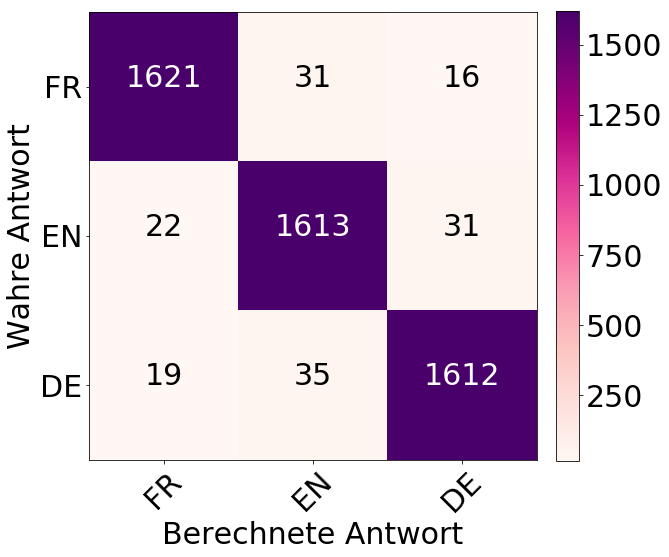

In [8]:
# Confusion Matrix with Voxforge Data
c_vox = make_confusion_matrix(models[0], data_vox, labels_vox)
plot_confusion_matrix(c_vox, normalize=False, title=False, cmap=plt.cm.RdPu)

int_axis=0 passed but is ignored, str_axis is used instead.


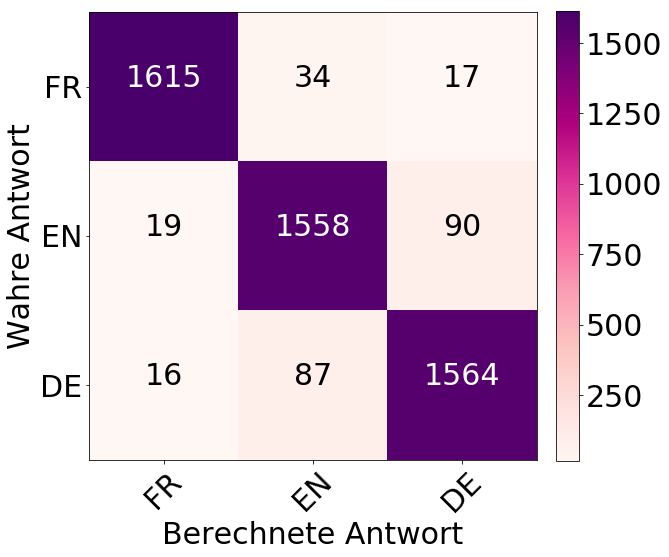

In [12]:
# Confusion Matrix with Youtube Data
c_you = make_confusion_matrix(models[0], data_you, labels_you)
plot_confusion_matrix(c_you, normalize=False, title=False, cmap=plt.cm.RdPu)

int_axis=0 passed but is ignored, str_axis is used instead.


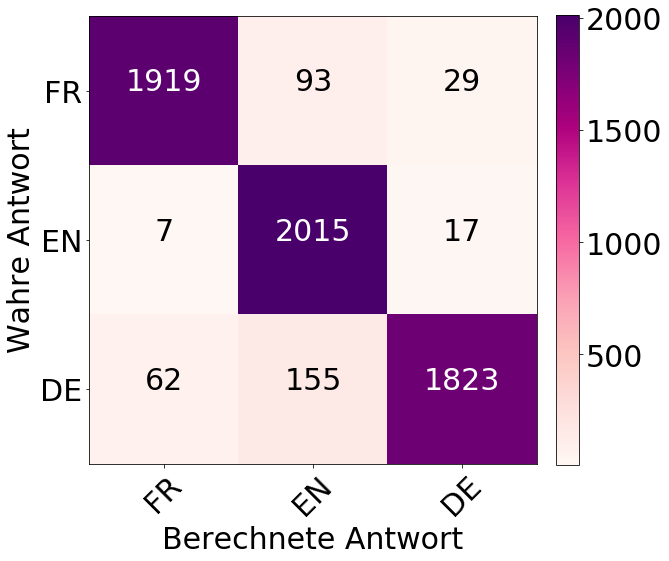

In [13]:
# Confusion Matrix with Librivox Data
c_lib = make_confusion_matrix(models[0], data_lib, labels_lib)
plot_confusion_matrix(c_lib, normalize=False, title=False, cmap=plt.cm.RdPu)

int_axis=0 passed but is ignored, str_axis is used instead.


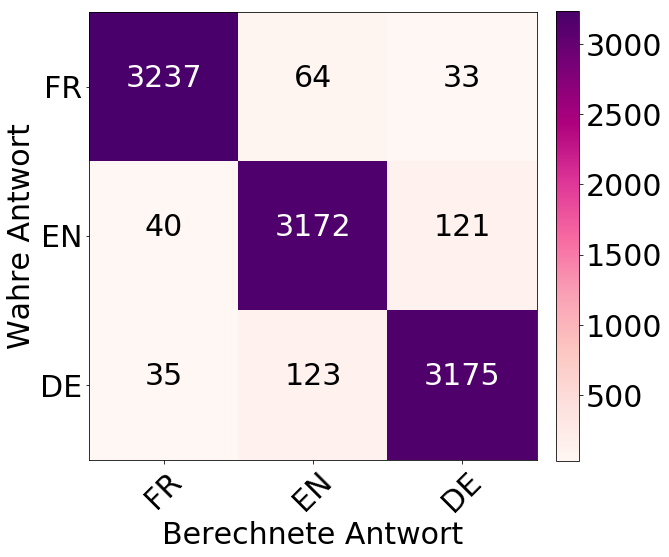

In [15]:
# Confusion Matrix with Voxforge and Youtube Data
c_voxyou = make_confusion_matrix(models[0], data_voxyou, labels_voxyou)
plot_confusion_matrix(c_voxyou, normalize=False, title=False, cmap=plt.cm.RdPu)